### 3.3.3 간단한 신경망의 구현

```mermaid
graph LR
    x1((x1))
    x2((x2))

    y1((y1))
    y2((y2))
    y3((y3))

    x1 -- w11 --> y1
    x1 -- w12 --> y2
    x1 -- w13 --> y3

    x2 -- w21 --> y1
    x2 -- w22 --> y2
    x2 -- w23 --> y3
```

- 편향과 활성화 함수 없이 가중치만 있는 간단한 신경망.
- 마치 1 * 2 행렬과 2 * 3 행렬을 곱한 꼴이 된다.

In [10]:
import numpy as np

class BasicANN:
    def __init__(self, w: np.array):
        self.w = w

    def calc(self, x: np.array) -> np.array:
        print(self.w)
        print(self.w.shape)
        return np.dot(x, self.w)

basicANN = BasicANN(np.array([[1, 3, 5], [2, 4, 6]]))
result = basicANN.calc(np.array([1, 2]))
print(result) # [5 11 17]

[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 3층 신경망 구현하기

```mermaid
graph LR
    subgraph Input Layer
        x1((x1))
        x2((x2))
    end

    subgraph Hidden Layer 1
        h1_1((h1_1))
        h1_2((h1_2))
        h1_3((h1_3))
    end

    subgraph Hidden Layer 2
        h2_1((h2_1))
        h2_2((h2_2))
    end

    subgraph Output Layer
        y1((y1))
        y2((y2))
    end

    %% Connections from Input to Hidden Layer 1
    x1 --> h1_1
    x1 --> h1_2
    x1 --> h1_3
    x2 --> h1_1
    x2 --> h1_2
    x2 --> h1_3

    %% Connections from Hidden Layer 1 to Hidden Layer 2
    h1_1 --> h2_1
    h1_1 --> h2_2
    h1_2 --> h2_1
    h1_2 --> h2_2
    h1_3 --> h2_1
    h1_3 --> h2_2

    %% Connections from Hidden Layer 2 to Output Layer
    h2_1 --> y1
    h2_1 --> y2
    h2_2 --> y1
    h2_2 --> y2
```

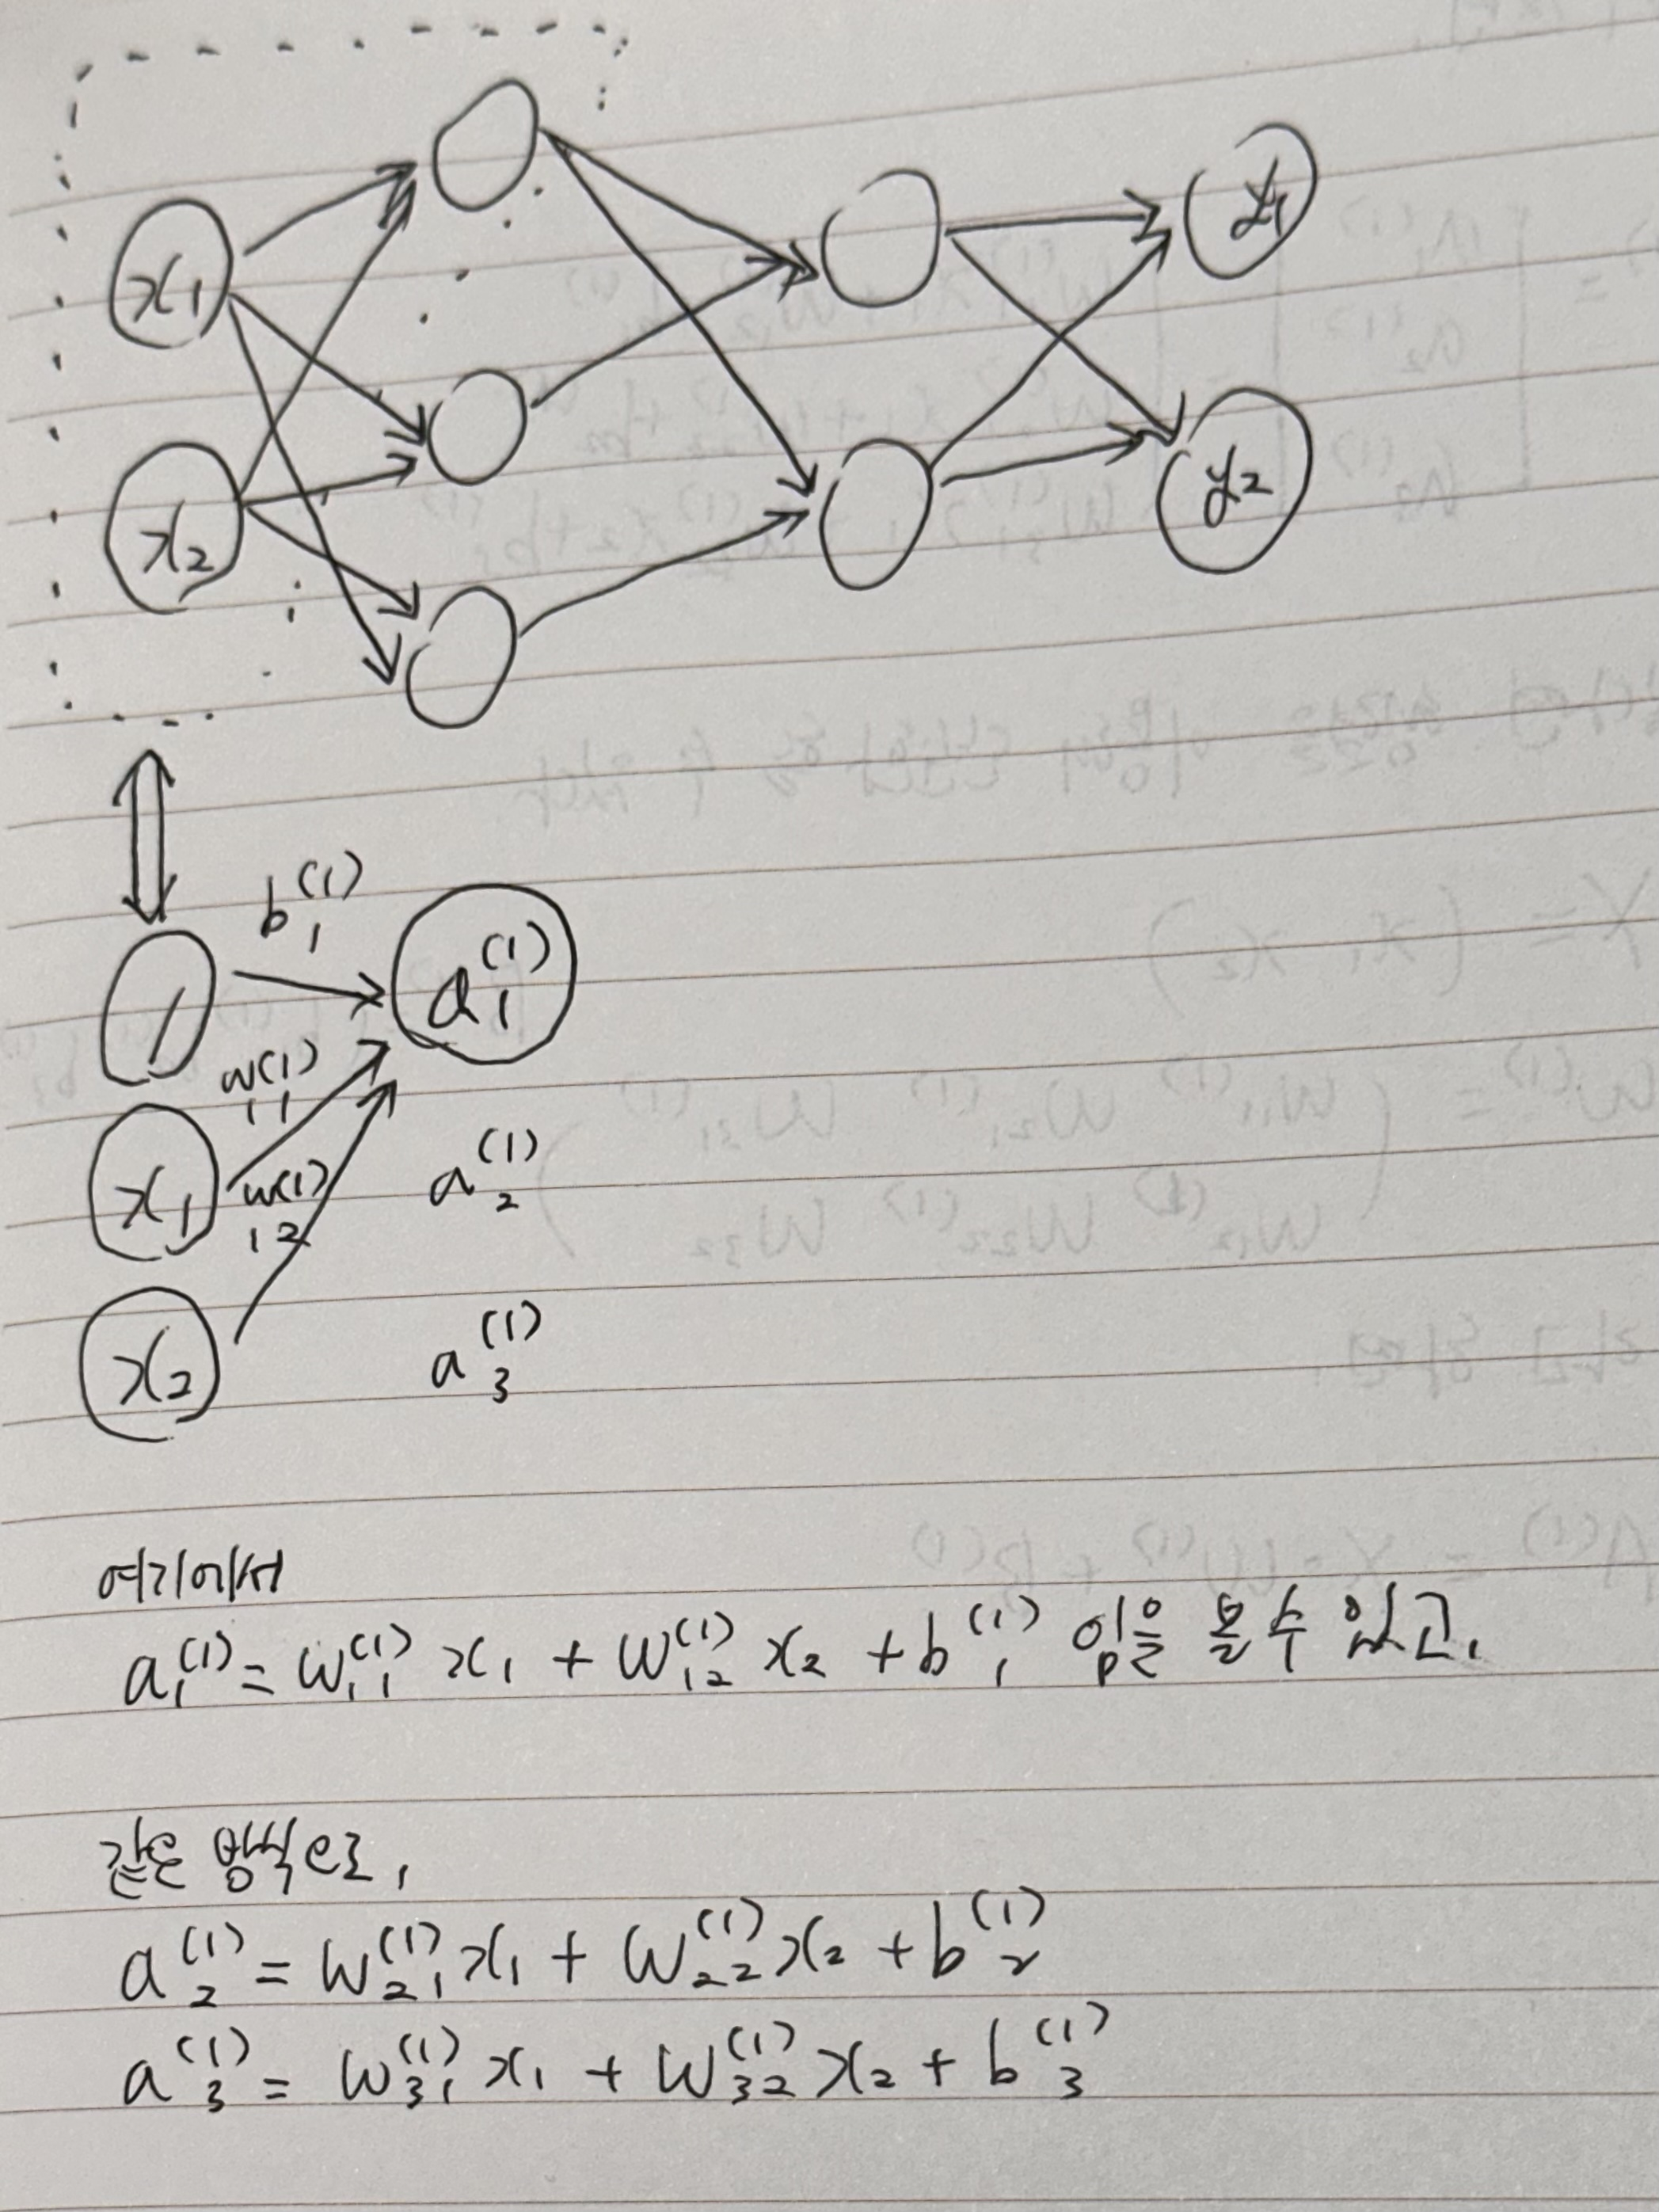

In [14]:
from IPython.display import Image
Image('./imgs/3-1.jpg')

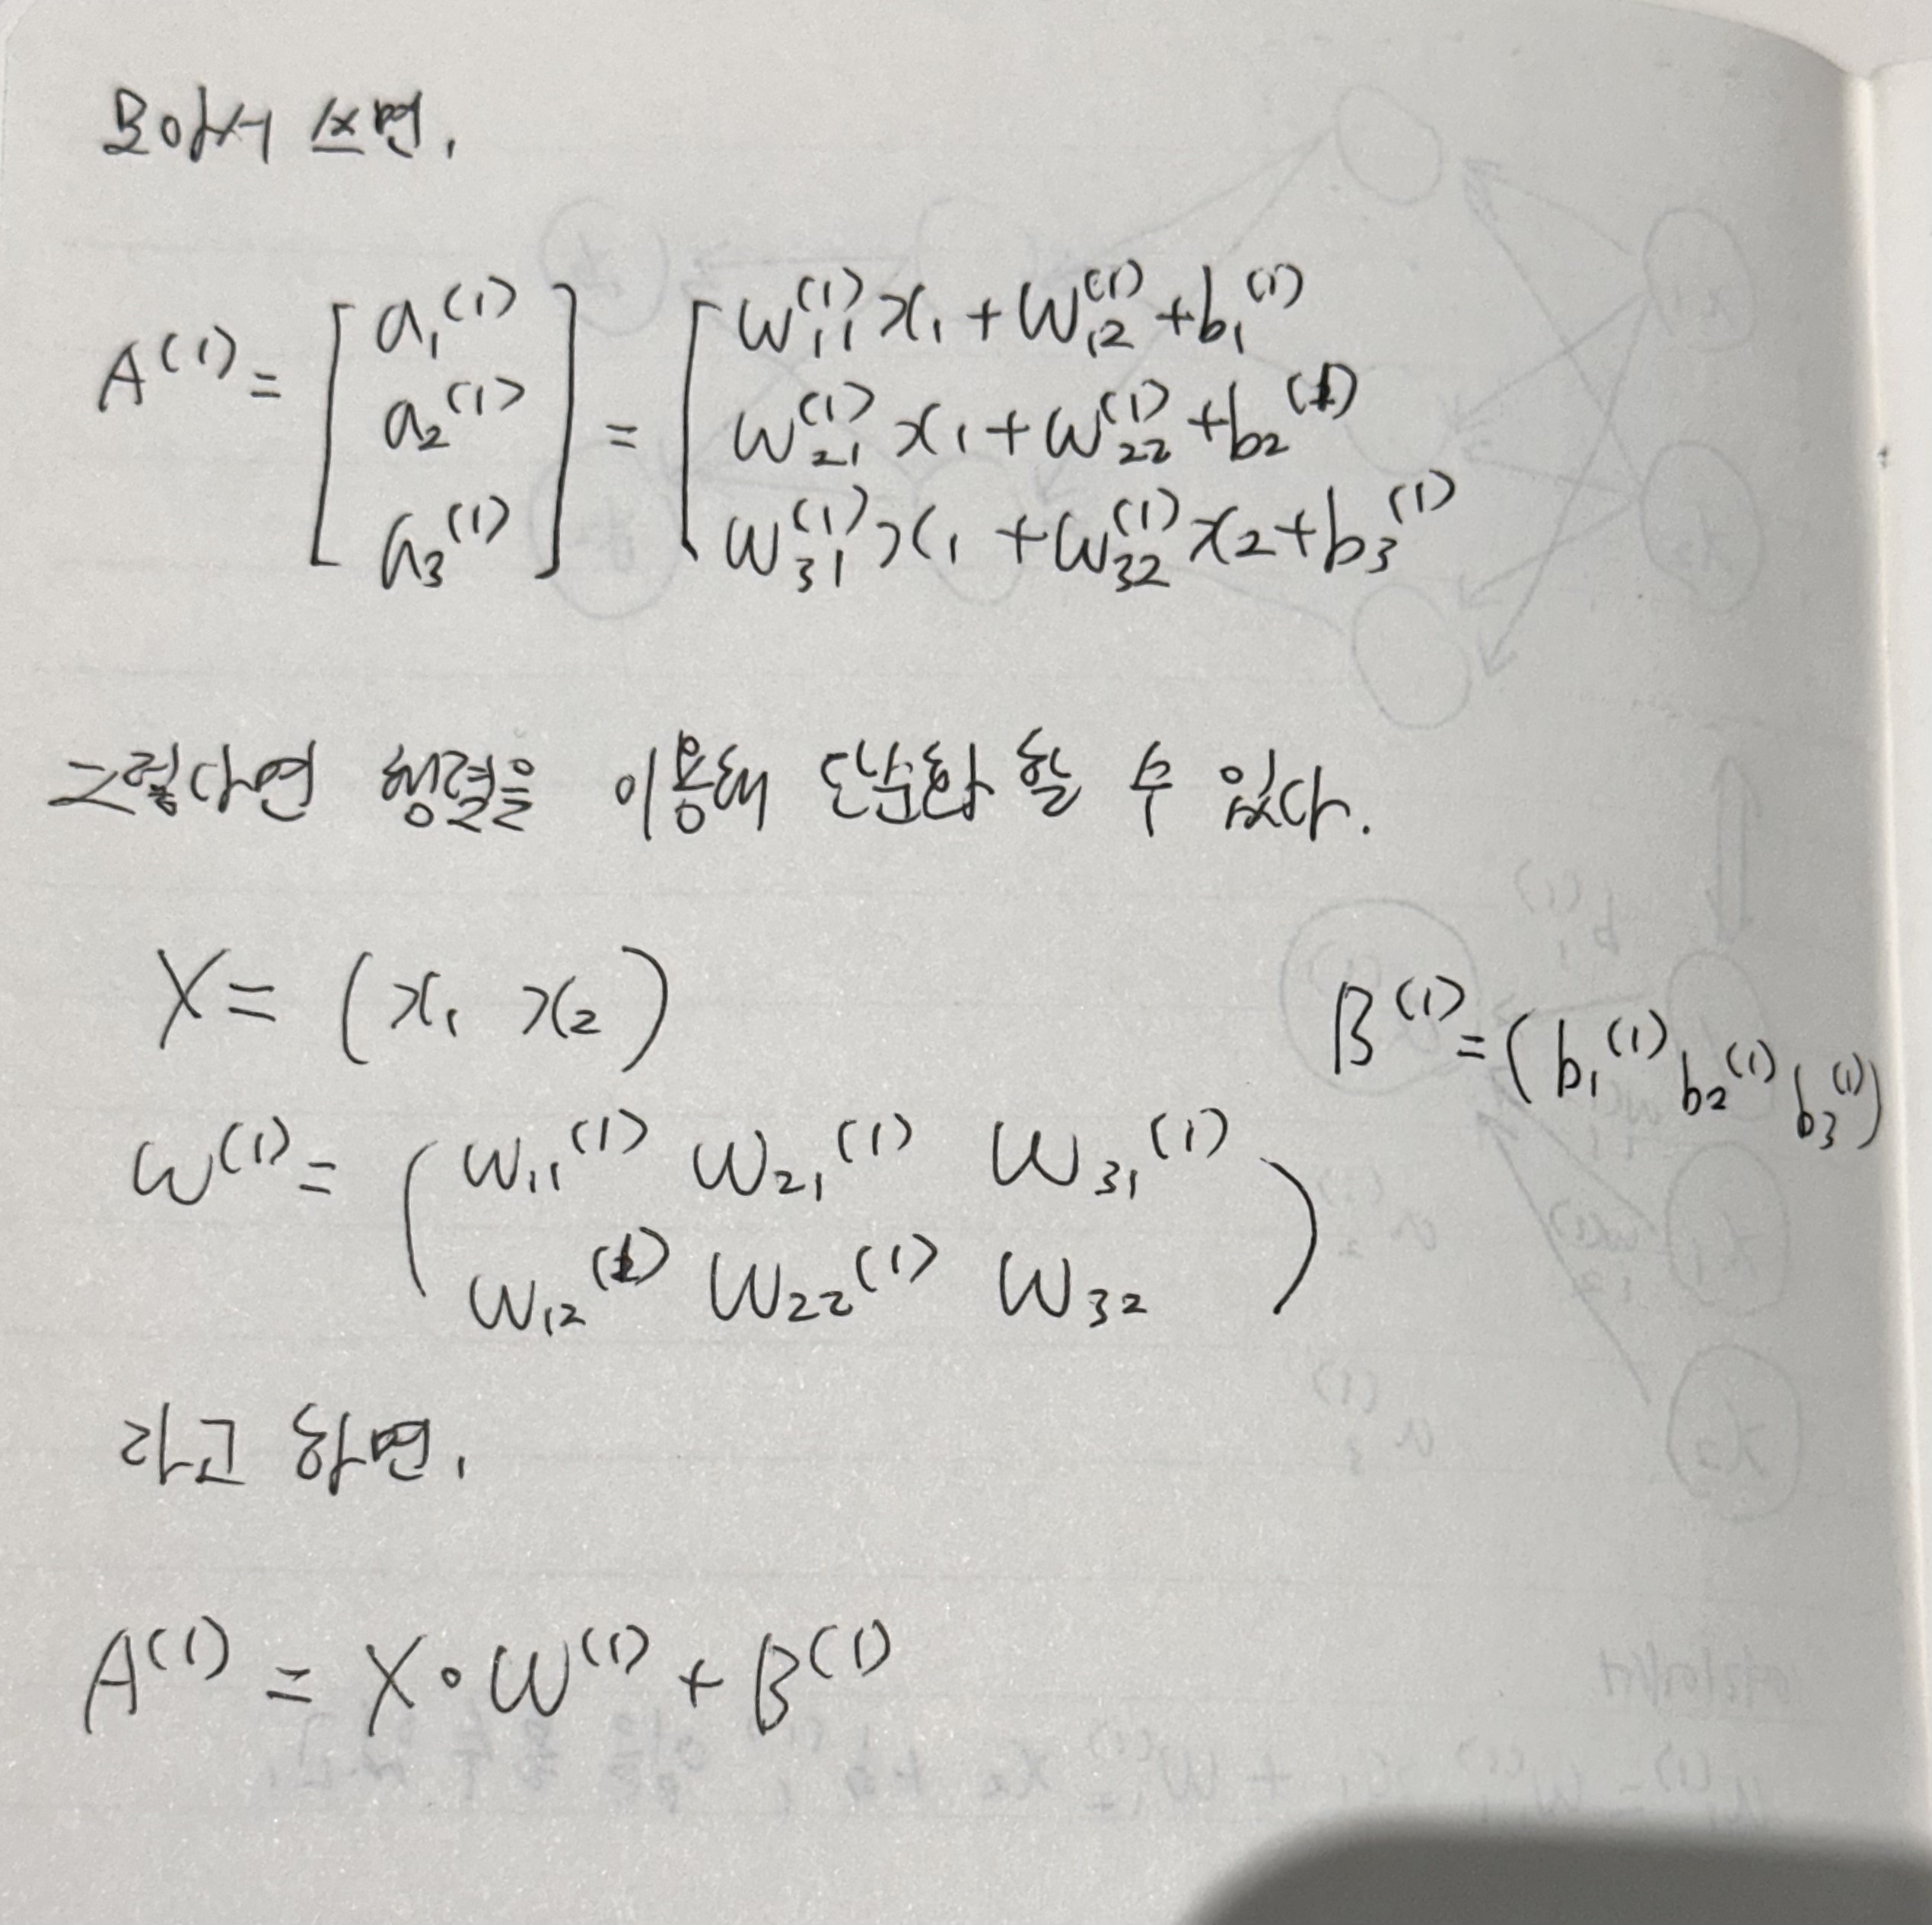

In [15]:
Image('./imgs/3-2.jpg')

In [17]:
# 위에서 유도한 A(1), X, W(1), B(1) 행렬 간의 계산을 그대로 옮긴다

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [18]:
# A1의 각 원소를 활성화 함수에 전달하면 1층의 출력 노드가 된다.

def sigmoid(x: np.array) -> np.array:
    return 1 / (1 + np.exp(-x))

Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [20]:
# 이후 다음 층에서도 이전 층에서의 출력값과 가중치 행렬을 곱한 후 편향 행렬을 더해주는 같은 패턴으로 계산이 단순화된다.
# 1층에서 2층으로의 신호 전달 과정을 그대로 코드로 옮긴다.

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


In [22]:
# 마지막 출력층도 동일하지만, 이전 층과 다르게 활성화 함수를 항등함수로 썼다.

identity = lambda x: x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity(A3)
print(Y)

[0.31682708 0.69627909]


**출력층의 활성화 함수는 필요에 따라 정한다.**

- 회귀: 항등함수
- 2클래스 분류: 시그모이드 함수
- 다중 클래스 분류: 소프트맥스 함수

나중에 다시 나온다.

In [ ]:
# 3층 신경망 전체 구현

class ThirdFloorNetwork:
    def __init__(self, W1: np.array, b1: np.array, W2: np.array, b2: np.array, W3: np.array, b3: np.array):
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        self.W3 = W3
        self.b3 = b3

    def sigmoid(self, x: np.array) -> np.array:
        return 1 / (1 + np.exp(-x))
    
    def indentiy(self, x: np.array) -> np.array:
        return x
    
    def forward(self, X: np.array) -> np.array:
        a1 = np.dot(X, W1) + self.b1
        z1 = self.sigmoid(a1)
        a2 = np.dot(z1, W2) + self.b2
        z2 = self.sigmoid(a2)
        a3 = np.dot(z2, W3) + self.b3
        y = self.indentiy(a3)

        return y

net = ThirdFloorNetwork(
    np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]),
    np.array([0.1, 0.2, 0.3]),
    np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]),
    np.array([0.1, 0.2]),
    np.array([[0.1, 0.3], [0.2, 0.4]]),
    np.array([0.1, 0.2])
)
y = net.forward(np.array([1.0, 0.5]))
print(y)

[0.31682708 0.69627909]
